In [44]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('beerdecoded2.csv')

fungi_columns = []
fungi_n_beer_columns = []

for col in df.columns:
    c = col.split(";")
    if c[-1] != '__' and c[0]=='k__Fungi':
        fungi_columns.append(col)
    if c[-1] != '__' and (c[0]=='k__Fungi' or c[0]=='beer'):
        fungi_n_beer_columns.append(col)

fungi_df = df.filter(fungi_columns)
fungi_n_beer_df = df.filter(fungi_n_beer_columns)

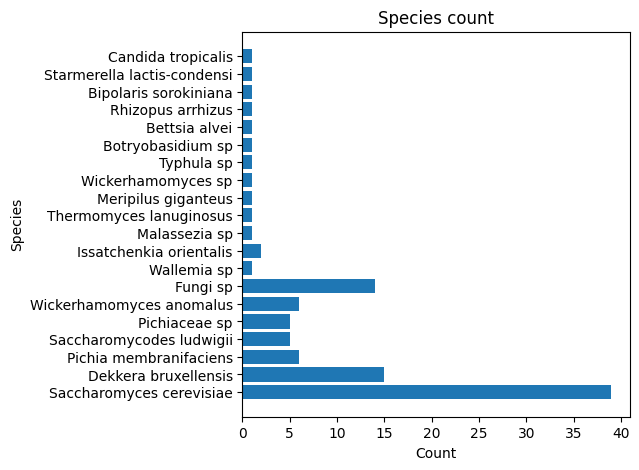

In [19]:
non_zero_cells = fungi_df[fungi_df != 0.0].count()

# Create a list of species names and counts
species_names = [label.split(';')[-1].strip()[3:].replace('_', ' ') for label in non_zero_cells.index.tolist()]
counts = non_zero_cells.tolist()

# Set up the plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.barh(species_names, counts)

# Set the labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Species')
ax.set_title('Species count')

# Display the plot
plt.show()

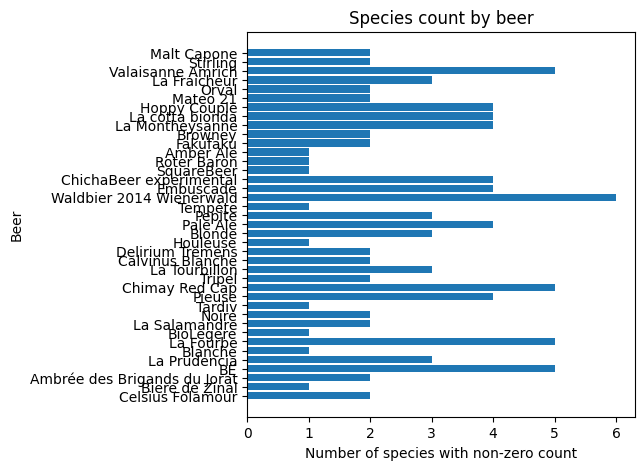

In [20]:
cur_df = fungi_n_beer_df
# Create a new column with the count of non-zero values for each row
cur_df['non_zero_count'] = (cur_df.iloc[:, :-1] > 0).sum(axis=1)

# Create a bar plot of non-zero counts by beer
fig, ax = plt.subplots(figsize=(5,5))
ax.barh(cur_df['beer'], cur_df['non_zero_count'])

# Set the labels and title
ax.set_xlabel('Number of species with non-zero count')
ax.set_ylabel('Beer')
ax.set_title('Species count by beer')

# Display the plot
plt.show()

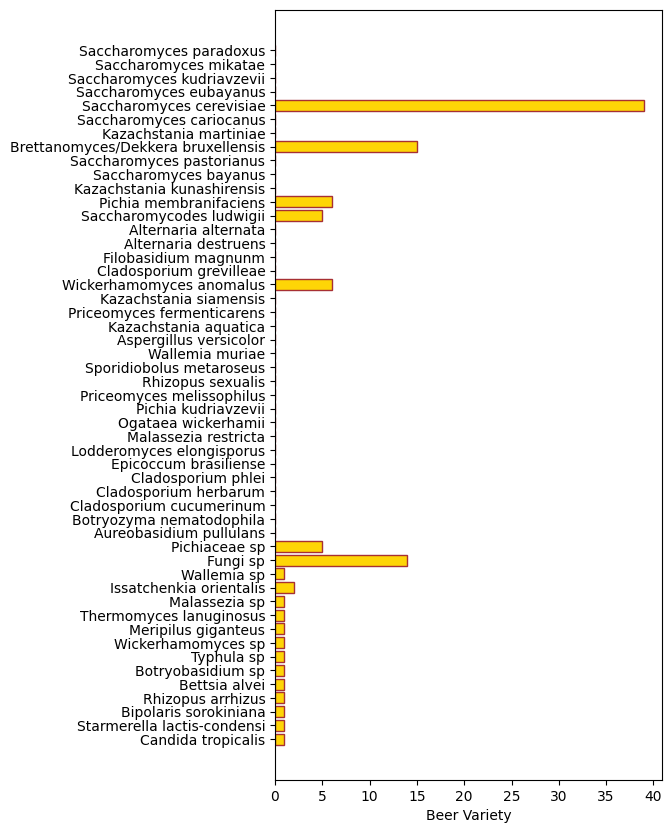

In [45]:
cur_df = fungi_df
# Read the contents of the text file
with open('beerdecoded_species.txt', 'r') as file:
    file_content = file.readlines()

# Remove any leading or trailing whitespace characters from each line
beerdecoded_species = [line.strip() for line in file_content]

# Create a list of species names and counts
cur_df.columns = [label.split(';')[-1].strip()[3:].replace('_', ' ') for label in cur_df.columns.tolist()]

cur_df.rename(columns={'Dekkera bruxellensis':'Brettanomyces/Dekkera bruxellensis'}, inplace=True)
# Check and add any missing columns from beerdecoded_species list
for i, species in enumerate(beerdecoded_species):
    if species == 'Brettanomyces bruxellensis':
        beerdecoded_species[i] = 'Brettanomyces/Dekkera bruxellensis'
    if beerdecoded_species[i] not in cur_df.columns:
        cur_df[beerdecoded_species[i]] = 0.0
        
# Create a new order list containing elements from beerdecoded_species first, then the remaining columns
new_order = beerdecoded_species + [col for col in cur_df.columns if col not in beerdecoded_species]
# Reorder dataframe according to new_order list
cur_df = cur_df[new_order]

non_zero_cells = cur_df[cur_df != 0.0].count()
counts = non_zero_cells.tolist()

counts = counts[::-1]
labels = cur_df.columns[::-1]
# Set up the plot
fig, ax = plt.subplots(figsize=(5,10))
ax.barh(labels, counts, color='#FED506', edgecolor='#A73033')

# Set the labels and title
ax.set_xlabel('Beer Variety')

# Display the plot
plt.show()

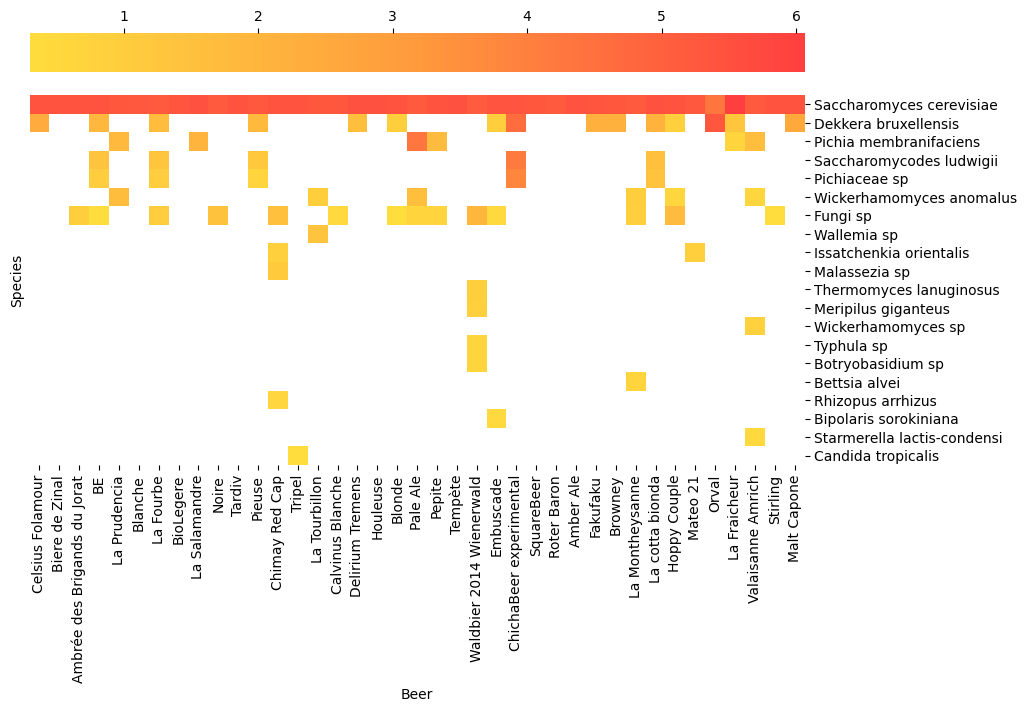

In [32]:
cur_df = fungi_n_beer_df
new_columns = []
for label in cur_df.columns.tolist():
    if label != 'beer':
        new_columns.append(label.split(';')[-1].strip()[3:].replace('_', ' '))
    else:
        new_columns.append('beer')

cur_df.columns = new_columns

from matplotlib.colors import LinearSegmentedColormap

# Define the custom colors
colors = ['#ffdd3d', '#ff9a3d', '#ff3f3f']

# Define the color map
cmap = LinearSegmentedColormap.from_list('custom_colormap', colors)

# Set the 'beer' column as the index
cur_df.set_index('beer', inplace=True)

# Transpose the DataFrame for heatmap plotting
cur_df = cur_df.T
cur_df = cur_df.replace(0, np.nan)
cur_df = np.log10(cur_df)

cur_df = cur_df.replace(0, np.nan)# Create the heatmap plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cur_df, cmap=cmap, cbar=True, ax=ax, cbar_kws={ 'location': 'top'})

# Set the x and y axis labels
ax.set_xlabel('Beer')
ax.set_ylabel('Species')

# Move y-axis indices to the right
ax.yaxis.tick_right()

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()



['Saccharomyces', 'Kazachstania', 'Brettanomyces', 'Pichia', 'Saccharomycodes', 'Alternaria', 'Filobasidium', 'Cladosporium', 'Wickerhamomyces', 'Priceomyces', 'Aspergillus', 'Wallemia', 'Sporidiobolus', 'Rhizopus', 'Ogataea', 'Malassezia', 'Lodderomyces', 'Epicoccum', 'Botryozyma', 'Aureobasidium']
Index(['Saccharomyces', 'Kazachstania', 'Brettanomyces/Dekkera', 'Pichia',
       'Saccharomycodes', 'Alternaria', 'Filobasidium', 'Cladosporium',
       'Wickerhamomyces', 'Priceomyces', 'Aspergillus', 'Wallemia',
       'Sporidiobolus', 'Rhizopus', 'Ogataea', 'Malassezia', 'Lodderomyces',
       'Epicoccum', 'Botryozyma', 'Aureobasidium',
       'Pichiaceae gen Incertae sedis', 'Fungi gen Incertae sedis',
       'Issatchenkia', 'Thermomyces', 'Meripilus', 'Typhula', 'Botryobasidium',
       'Bettsia', 'Bipolaris', 'Starmerella', 'Candida'],
      dtype='object')


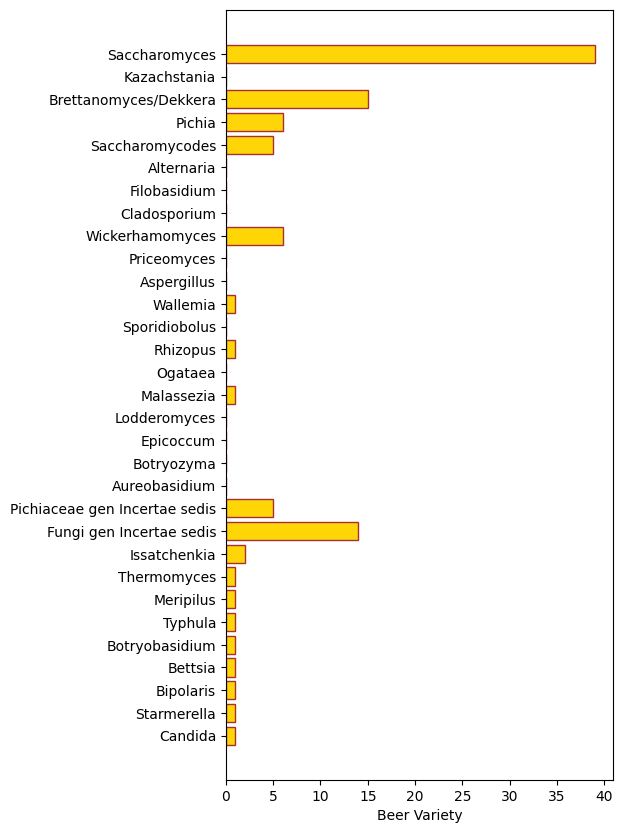

In [7]:
cur_df = fungi_df
# Read the contents of the text file
with open('beerdecoded_genus.txt', 'r') as file:
    file_content = file.readlines()

# Remove any leading or trailing whitespace characters from each line
seen = set()
beerdecoded_genus = []
for line in file_content:
    element = line.split(';')[0].strip()
    if element not in seen:
        beerdecoded_genus.append(element)
        seen.add(element)
        
print(beerdecoded_genus)

# Create a list of species names and counts
label_dict = {}
for label in cur_df.columns.tolist():
    split_label = label.split(';')
    if len(split_label) > 5:  # Check if the label can be split into at least six parts
        new_label = split_label[-2].strip().replace('_', ' ')[3:]
        if new_label in label_dict:
            label_dict[new_label].append(label)
        else:
            label_dict[new_label] = [label]

# Create a new dataframe to hold the merged data
new_df = pd.DataFrame()
for new_label, old_labels in label_dict.items():
    new_df[new_label] = cur_df[old_labels].sum(axis=1)

# If you want the new dataframe to replace the old one
cur_df = new_df

cur_df.rename(columns={'Dekkera':'Brettanomyces/Dekkera'}, inplace=True)
# print(cur_df)

# Check and add any missing columns from beerdecoded_species list
for i, genus in enumerate(beerdecoded_genus):
    if genus == 'Brettanomyces':
        beerdecoded_genus[i] = 'Brettanomyces/Dekkera'
    if beerdecoded_genus[i] not in cur_df.columns:
        cur_df[beerdecoded_genus[i]] = 0.0
        
# Create a new order list containing elements from beerdecoded_species first, then the remaining columns
new_order = beerdecoded_genus + [col for col in cur_df.columns if col not in beerdecoded_genus]
# Reorder dataframe according to new_order list
cur_df = cur_df[new_order]

print(cur_df.columns)
non_zero_cells = cur_df[cur_df != 0.0].count()
counts = non_zero_cells.tolist()

counts = counts[::-1]
labels = cur_df.columns[::-1]
# Set up the plot
fig, ax = plt.subplots(figsize=(5, 10))
ax.barh(labels, counts, color='#FED506', edgecolor='#A73033')

# Set the labels and title
ax.set_xlabel('Beer Variety')

# Display the plot
plt.show()

['Saccharomyces', 'Kazachstania', 'Brettanomyces', 'Pichia', 'Saccharomycodes', 'Alternaria', 'Filobasidium', 'Cladosporium', 'Wickerhamomyces', 'Priceomyces', 'Aspergillus', 'Wallemia', 'Sporidiobolus', 'Rhizopus', 'Ogataea', 'Malassezia', 'Lodderomyces', 'Epicoccum', 'Botryozyma', 'Aureobasidium']
                 non_zero_count
Saccharomyces                39
Kazachstania                 39
Brettanomyces                39
Pichia                       23
Saccharomycodes              20
Alternaria                   20
Filobasidium                  8
Cladosporium                  6
Wickerhamomyces               5
Priceomyces                   3
Aspergillus                   3
Wallemia                      2
Sporidiobolus                 2
Rhizopus                      2
Ogataea                       2
Malassezia                    2
Lodderomyces                  2
Epicoccum                     2
Botryozyma                    2
Aureobasidium                 2
20


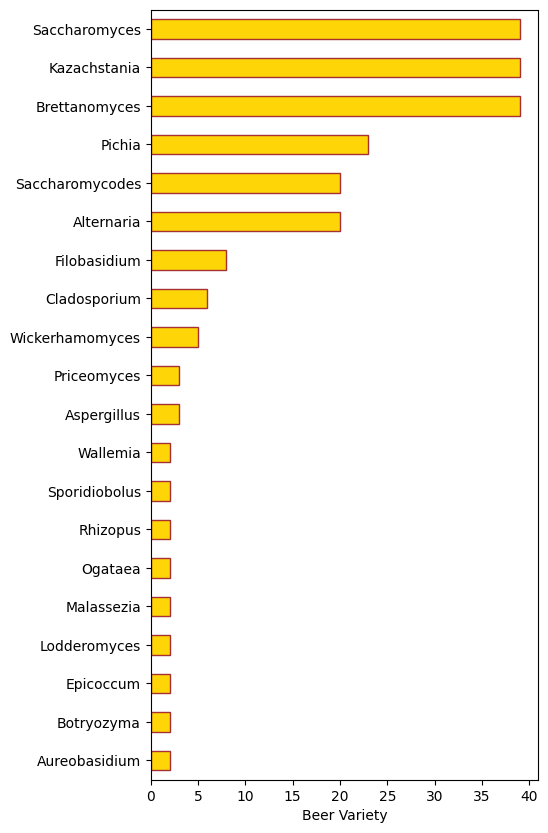

In [20]:
df = pd.read_csv('BeerDecoded_mat.csv')  # replace 'your_file.xlsx' with your actual Excel file name

with open('beerdecoded_genus.txt', 'r') as file:
    file_content = file.readlines()

# Remove any leading or trailing whitespace characters from each line
seen = set()
beerdecoded_genus = []
for line in file_content:
    element = line.split(';')[0].strip()
    if element not in seen:
        beerdecoded_genus.append(element)
        seen.add(element)
        
print(beerdecoded_genus)

# Split each column name and use the first word as the new column name
df.columns = [col.split()[0] for col in df.columns]

# Merge columns with the same name by summing them
df = df.groupby(df.columns, axis=1).sum()

# Keep only columns that exist in col_list
df = df[beerdecoded_genus]

# Count non zero rows for each column
non_zero_count = df.astype(bool).sum(axis=0)

# Create a new dataframe with these counts
df_counts = pd.DataFrame(non_zero_count, columns=['non_zero_count'])

print(df_counts)

print(len(df_counts.index))

# Reverse the DataFrame
df_counts = df_counts.iloc[::-1]

# Plotting
fig, ax = plt.subplots(figsize=(5, 10))
df_counts['non_zero_count'].plot(kind='barh', color='#FED506', edgecolor='#A73033')

# Set the labels and title
ax.set_xlabel('Beer Variety')

# Show the plot
plt.show()